<a href="https://colab.research.google.com/github/AbhisheksharmaIITP/Student-Score-Prediction/blob/main/Student_Score_Prediction_ColabReady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Score Prediction (Colab Ready Version)
## Data Analytics Project – End-to-End (Python + SQL + Tableau)
This notebook is **Colab-ready**: paths fixed for `/content/`, RMSE bug fixed, and outputs for Tableau dashboard generation included.

**Viva Tip:** Har step ke upar short notes diye gaye hain jo explain karne me help karenge.


### Step 1 – Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# File paths for Colab (upload these files into Colab /content/ before running)
csv_path = "/content/student_study_scores.csv"
db_path = "/content/students.db"
scored_csv_path = "/content/scored_data.csv"
metrics_path = "/content/metrics.csv"


### Step 2 – Load Dataset

In [2]:
df = pd.read_csv("/content/student_study_scores.csv")
df.head()

,Student_ID,Hours_Studied,Attendance,Gender,Final_Score
0,S1001,4.76,79.2,Male,69.6
1,S1002,2.91,82.5,Female,53.2
2,S1003,5.22,54.2,Male,66.9
3,S1004,4.34,70.8,Female,65.6
4,S1005,1.02,52.1,Male,34.7


### Step 3 – Dataset Info & Summary

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     120 non-null    object 
 1   Hours_Studied  120 non-null    float64
 2   Attendance     120 non-null    float64
 3   Gender         120 non-null    object 
 4   Final_Score    120 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.8+ KB


,Hours_Studied,Attendance,Final_Score
count,120.000000,120.000000,120.000000
mean,3.243083,74.368333,55.166667
std,1.505688,15.056214,16.234181
min,0.540000,50.700000,21.900000
25%,1.990000,59.950000,42.125000
50%,3.085000,74.600000,57.250000
75%,4.502500,87.650000,67.125000
max,5.870000,99.600000,94.500000


### Step 4 – EDA (Scatter Plots)

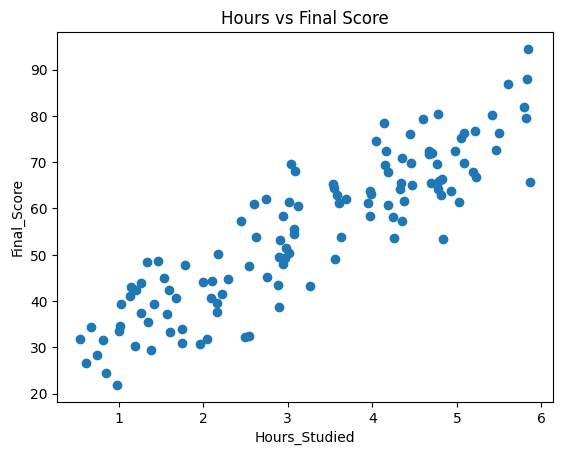

In [4]:
plt.scatter(df["Hours_Studied"], df["Final_Score"])
plt.xlabel("Hours_Studied")
plt.ylabel("Final_Score")
plt.title("Hours vs Final Score")
plt.show()

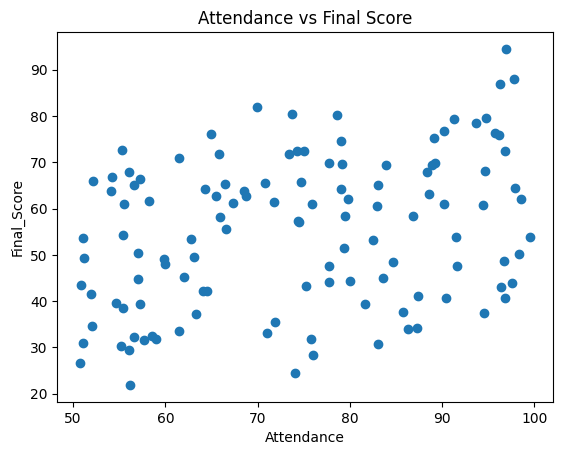

In [5]:
plt.scatter(df["Attendance"], df["Final_Score"])
plt.xlabel("Attendance")
plt.ylabel("Final_Score")
plt.title("Attendance vs Final Score")
plt.show()

In [6]:
import sqlite3
con = sqlite3.connect(db_path)

# Create table
df.to_sql("study_data", con, if_exists="replace", index=False)

con.close()
print("Table 'study_data' created successfully in database!")


Table 'study_data' created successfully in database!


### Step 5 – SQL Integration

In [7]:
con = sqlite3.connect("/content/students.db")
q1 = pd.read_sql_query("SELECT COUNT(*) AS total_records FROM study_data;", con)
q2 = pd.read_sql_query("SELECT AVG(Final_Score) AS avg_score FROM study_data;", con)
q3 = pd.read_sql_query("SELECT Gender, AVG(Final_Score) AS avg_score_by_gender FROM study_data GROUP BY Gender;", con)
q4 = pd.read_sql_query("SELECT * FROM study_data WHERE Attendance >= 90 ORDER BY Final_Score DESC LIMIT 5;", con)
con.close()
q1, q2, q3, q4

(   total_records
 0            120,
    avg_score
 0  55.166667,
    Gender  avg_score_by_gender
 0  Female            54.367742
 1    Male            56.020690,
   Student_ID  Hours_Studied  Attendance  Gender  Final_Score
 0      S1023           5.84        96.9  Female         94.5
 1      S1104           5.83        97.8    Male         88.0
 2      S1012           5.60        96.3  Female         86.9
 3      S1032           5.82        94.8  Female         79.6
 4      S1031           4.60        91.3  Female         79.3)

### Step 6 – Train/Test Split & Models

In [8]:
X = df[["Hours_Studied", "Attendance"]]
y = df["Final_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

# Decision Tree
tree = DecisionTreeRegressor(random_state=42, max_depth=4)
tree.fit(X_train, y_train)
y_pred_dt = tree.predict(X_test)

# Metrics (manual RMSE fix)
def metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred) ** 0.5
    }

m_lr = metrics(y_test, y_pred_lr)
m_dt = metrics(y_test, y_pred_dt)
m_lr, m_dt

({'R2': 0.8645551505016149,
  'MAE': 4.78698681022981,
  'RMSE': 5.8361410233796365},
 {'R2': 0.8192237548078594,
  'MAE': 4.739199735449732,
  'RMSE': 6.742410820486214})

### Step 7 – Save Model & Export Data

In [9]:
joblib.dump(linreg, "/content/score_model_linear.pkl")
df_scored = df.copy()
df_scored["Predicted_Score"] = linreg.predict(df_scored[["Hours_Studied", "Attendance"]]).round(1)
df_scored.to_csv("/content/scored_data.csv", index=False)

metrics_df = pd.DataFrame([{"Model":"LinearRegression", **m_lr}, {"Model":"DecisionTree(max_depth=4)", **m_dt}])
metrics_df.to_csv("/content/metrics.csv", index=False)
metrics_df

,Model,R2,MAE,RMSE
0,LinearRegression,0.864555,4.786987,5.836141
1,DecisionTree(max_depth=4),0.819224,4.739200,6.742411


### Step 8 – Fairness Check

In [10]:
residuals = y_test.reset_index(drop=True) - pd.Series(y_pred_lr).reset_index(drop=True)
gender_test = df.loc[y_test.index, "Gender"].reset_index(drop=True)
fairness_df = pd.DataFrame({"Gender": gender_test, "Residual": residuals})
fairness_summary = fairness_df.groupby("Gender")["Residual"].agg(["mean", "median", "count"])
fairness_summary

,mean,median,count
Gender,,,
Female,-2.701395,-2.961419,11
Male,-1.532135,-1.941621,13


### Step 9 – Example Prediction

In [11]:
example = pd.DataFrame({"Hours_Studied":[4.0], "Attendance":[80.0]})
pred = linreg.predict(example)[0]
round(pred, 1)

np.float64(64.5)

### Step 10 – Save to Google Drive (Optional)

In [12]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/scored_data.csv /content/drive/MyDrive/
!cp /content/metrics.csv /content/drive/MyDrive/
!cp /content/score_model_linear.pkl /content/drive/MyDrive/
print("Files copied to Google Drive/MyDrive")

Mounted at /content/drive
Files copied to Google Drive/MyDrive
